# Computational Finance Assignment1

In [6]:
import math
import csv
import time
import sympy as sp
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd



## Part I Theory: derivatives and no-arbitrage

### 1.Prove:

\begin{aligned}
A &= C \left(1 + \frac{r}{n}\right)^{nt} \\
&= C \cdot e^{rt}
\end{aligned}


The standard compound interest formula is: 

\begin{aligned}
A &= C \left(1 + \frac{r}{n}\right)^{nt}
\end{aligned}
where:

- `A` is the future value,
- `C` is the principal (initial investment),
- `r` is the annual interest rate,
- `n` is the number of compound interest per year,
- `t` is time in years.

As we let `n` go to infinity, we can use the property of the base `e` of the natural logarithm, $\lim_{n \to \infty} \left(1 + \frac{1}{n}\right)^n$

 tends to `e` as `n` goes to infinity. We set `n = 1,10,100,1000,10000` to compare these two results


In [7]:
C = 1 
r = 0.1
t = 1

A_true = C * math.exp(r * t) 
ns = [1, 10, 100, 1000, 10000]

A_n_values = []
absolute_errors = []

for n in ns:
    A_n = C * pow(1 + r/n, n * t)
    A_n_values.append(A_n)
    absolute_error = abs(A_true - A_n) / A_true
    absolute_errors.append(absolute_error)
    print(f"Continuous compound interest : {A_true} ", f"Standard compound interest (with n = {n}): {A_n}")
    print(f"Absolute Error: {absolute_error}")
    print("\n")

plt.figure(figsize=(7, 5))

# Plot A_true
plt.plot([0, 10000], [A_true, A_true], label='Continuous Compound Interest', linestyle='--')

# Plot A_n for different values of n
plt.plot(ns, A_n_values, marker='o', label='Standard Compound Interest')

plt.xlabel('Number of compoundings per year (n)', fontsize =16)
plt.ylabel('Future Value (A)', fontsize =16)

plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.xticks(ns, ns)  # Set the x-ticks to match the values in ns
plt.legend(fontsize =13)
plt.grid(True)
plt.savefig('example.png',dpi = 500)

plt.show()



Continuous compound interest : 1.1051709180756477  Standard compound interest (with n = 1): 1.1
Absolute Error:0.004678840160444468


Continuous compound interest : 1.1051709180756477  Standard compound interest (with n = 10): 1.1046221254112045
Absolute Error:0.0004965681375318483


Continuous compound interest : 1.1051709180756477  Standard compound interest (with n = 100): 1.105115697720756
Absolute Error:4.9965443343330296e-05


Continuous compound interest : 1.1051709180756477  Standard compound interest (with n = 1000): 1.1051653926032206
Absolute Error:4.999654204419592e-06


Continuous compound interest : 1.1051709180756477  Standard compound interest (with n = 10000): 1.1051703654947347
Absolute Error:4.999958865992143e-07




From the figure, we can see that as n increases, the two gradually approach each other. When n is very large, we can consider the two to be equal.

### 2.Calculate the fair-value of a coupon bond.

In [8]:


# Calculate the fair value of a bond
# Given parameters
face_value = 50000  # Face value of the bond
coupon = 300  # Coupon payment per quarter
maturity = 2  # Maturity period in years
risk_free_rate = 0.015  # Risk-free interest rate
quarters = maturity * 4  # Total number of quarters for payments

# Calculate the present value of each quarter
present_value_coupons = sum(coupon * sp.exp(-risk_free_rate * t/4) for t in range(1, quarters + 1))

# Present value of the final principal payment
present_value_face_value = face_value * sp.exp(-risk_free_rate * maturity)

# The fair value of the bond is the sum of present values of all cash flows
fair_value_bond = present_value_coupons + present_value_face_value

print(f"Fair-value of this coupon bond : {fair_value_bond.evalf()}")  # Evaluate the numerical result of the expression




Fair-value of this coupon bond : 50882.2035943076


### 3.Calculate forward price of a contract at time zero

In financial markets, the fair forward price of a contract at time zero is often calculated using the no-arbitrage principle. This principle dictates that the price of derivative securities must be set in a way that does not allow for arbitrage opportunities through risk-free trades with guaranteed profits. The fair forward price, denoted by $F_0$, is expressed as $S_0 \cdot e^{rT}$
, which indicates that the forward price is equivalent to the current price of the underlying asset $S_0$, compounded at the risk-free interest rate r over the time to maturity T.

Thus, if the actual forward price in the market deviates from $S_0 \cdot e^{rT}$, arbitrageurs can exploit this difference to secure risk-free profits. 

If the market forward price is higher than $S_0 \cdot e^{rT}$, it is profitable to sell the forward contract and invest the current underlying asset price $S_0$ at the risk-free rate r. 

Conversely, if the market forward price is lower than $S_0 \cdot e^{rT}$, one can achieve a risk-free profit by entering into a forward contract to buy the asset and simultaneously borrowing the amount $S_0$ to purchase the underlying asset. This process will continue until the market forward price adjusts to match the no-arbitrage price of $S_0 \cdot e^{rT}$.

### 4. Draw the pay-oﬀ diagrams for two portfolios

1. A call option and an investment of $K \cdot e^{-rT}$ in the money-market; 
2. A put option and one share of the stock S.


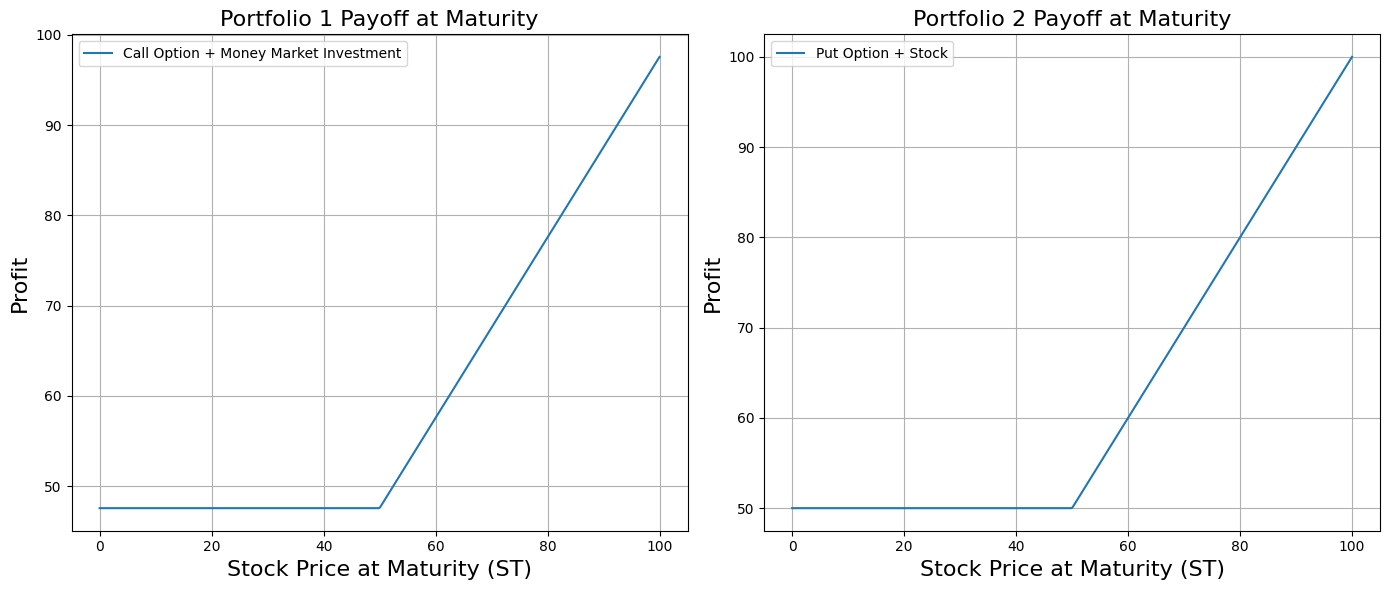

In [9]:

# Define the parameters
K = 50  # Strike price
r = 0.05  # Risk-free rate
T = 1  # Time to maturity
S0 = 50  # Current stock price

# Define the range of stock prices at maturity
ST = np.linspace(0, 100, 500)

# Calculate the payoff for a call option at maturity
call_payoff = np.maximum(ST - K, 0)
# Calculate the present value of the investment in the money market
money_market_investment = K 
# Total payoff for the first portfolio (call option + money market investment)
portfolio1_payoff = call_payoff + money_market_investment

# Calculate the payoff for a put option at maturity
put_payoff = np.maximum(K - ST, 0)
# Total payoff for the second portfolio (put option + stock)
portfolio2_payoff = put_payoff + ST

# Plot the pay-off diagrams for both portfolios
plt.figure(figsize=(14, 6))

# Portfolio 1: Call option and money market investment
plt.subplot(1, 2, 1)
plt.plot(ST, portfolio1_payoff, label='Call Option + Money Market Investment')
plt.title('Portfolio 1 Payoff at Maturity', fontsize=16)
plt.xlabel('Stock Price($S_T$)', fontsize=16)
plt.ylabel('Profit', fontsize = 16)
plt.legend(fontsize=13)
plt.grid(True)

# Portfolio 2: Put option and stock
plt.subplot(1, 2, 2)
plt.plot(ST, portfolio2_payoff, label='Put Option + Stock',color='#FFA500')
plt.title('Portfolio 2 Payoff at Maturity', fontsize=16)
plt.xlabel('Stock Price($S_T$)', fontsize=16)
plt.ylabel('Profit', fontsize=16)
plt.legend(fontsize=13)
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.savefig('plots\\5.1 two portfolios compare.png',dpi = 500)
plt.show()


Portfolio 1 Payoff at Maturity (Call Option + Money Market Investment): This graph shows that if the stock price at maturity (ST) is below the strike price (K), the payoff is constant because the call option is not exercised and the investor only gets the money market investment value. As the stock price exceeds the strike price, the payoff increases linearly with ST since the call option is exercised.

Portfolio 2 Payoff at Maturity (Put Option + Stock): This graph illustrates that if the stock price at maturity is above the strike price, the payoff is linear and increases with ST because the put option is not exercised, and the investor owns the stock. When the stock price is below the strike price, the payoff is constant because the put option is exercised, ensuring the investor sells the stock at the strike price K.

The linear payoff beyond the strike price reflects the characteristics of owning the underlying asset (stock) with the protection of an option. The flat part of the payoff represents the protective feature of the option where the loss is limited to the premium paid for the option. ​

### 5. Prove put-call parity：$C_t + K \cdot e^{-rT} = P_t + S_0$
#### Portfolio A:
- Consists of one European call option with the value $C_t$ and an investment of $K \cdot e^{-rT}$ in the risk-free asset. The payoff at maturity is the greater of $S_T - K$ or 0, plus K, which simplifies to max($S_T$, K).

#### Portfolio B:
- Consists of one European put option with the value $P_t$ and one share of the stock $S_0$. The payoff at maturity is the greater of $K - S_T$ or 0, plus $S_T$, which simplifies to max($S_T$, K).

Given that the payoff of both portfolios is the same at maturity, and no arbitrage opportunities exist, their value should be equal at the present time. This leads to the equation:

$C_t + K \cdot e^{-rT} = P_t + S_0$


## Part II: Binomial tree: option valuation

#### 1. Build the binomial rree and test

In [10]:
def build_tree(S, vol, T, N):
    '''
    Build a binomial tree for option pricing.
    Paramers:
        S: Initial stock price
        vol: Volatility`
        T: Time to expiration
        N: Number of steps
    Output:
        A 2D array representing the binomial tree
    '''
    dt = T / N  # Time step
    u = np.exp(vol * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    matrix = np.zeros((N + 1, N + 1))  # Create a 2D array for tree to store the stock prices
    
    for i in range(N + 1): 
        for j in range(i + 1):  
            matrix[i, j] = S * (u ** j) * (d ** (i - j))
            
    return matrix

def value_option_matrix(tree, T, r, K, vol):
    '''
    Calculate the option value using a binomial tree.
    Parameters:
        tree: Binomial tree
        T: Time to expiration
        r: Risk-free interest rate
        K: Strike price
        vol: Volatility
    Output:
        Option value at the root of the tree
    '''
    N = tree.shape[0] - 1  # Number of steps
    dt = T / N 
    u = np.exp(vol * np.sqrt(dt)) 
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    for c in range(N + 1):
        tree[N, c] = max(0, tree[N, c] - K) # Option value at expiration
    
    for i in range(N - 1, -1, -1): 
        for j in range(i + 1):
            # Calculate the expected value of the option
            tree[i, j] = np.exp(-r * dt) * (p * tree[i + 1, j + 1] + (1 - p) * tree[i + 1, j])
            
    return tree[0, 0]

In [11]:
sigma = 0.2  # Volatility
S = 100  # Current stock price
T = 1.0  # Time to maturity
N = 50  # Number of steps
K = 99  # Strike price
r = 0.06  # Risk-free interest rate

tree = build_tree(S, sigma, T, N)
option_price = value_option_matrix(tree, T, r, K, sigma)
option_price

11.546434850755071

#### 2.  Compare with the Black-Scholes fomula on value of option
First we compare the difference between the Black-Scholes fomula and the binomial tree's computed result.

In [12]:
def black_scholes_call(S, K, T, r, sigma):
    """
    Computes the Black-Scholes formula for a European call option.
    
    Parameters:
        S : float
            Current stock price
        K : float
            Strike price
        T : float
            Time to expiration
        r : float
            Risk-free interest rate
        sigma : float
            Volatility of the underlying stock
    
    Returns:
        call_price : float
            Price of the European call option
    """
    # Calculate d1 and d2 parameters
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Calculate call price using cumulative distribution functions
    call_price = (S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)) 
    
    return call_price

def compare_volatilities(S, K, T, r, vol_range, N):
    '''
    Compare option prices for different volatilities.
    Parameters:
        S : float
            Current stock price
        K : float
            Strike price
        T : float
            Time to expiration
        r : float
            Risk-free interest rate
        vol_range : array
            Array of volatilities
    Returns:
        bs_prices : array
            Array of option prices for different volatilities under Black-Scholes model and binomial tree model
    '''
    bs_prices = []
    bt_prices = []
    for sigma in vol_range:
        bs_price = black_scholes_call(S, K, T, r, sigma)
        bs_prices.append(bs_price)
        tree = build_tree(S, sigma, T, N)
        option_price = value_option_matrix(tree, T, r, K, sigma)
        bt_prices.append(option_price)
    return bs_prices, bt_prices


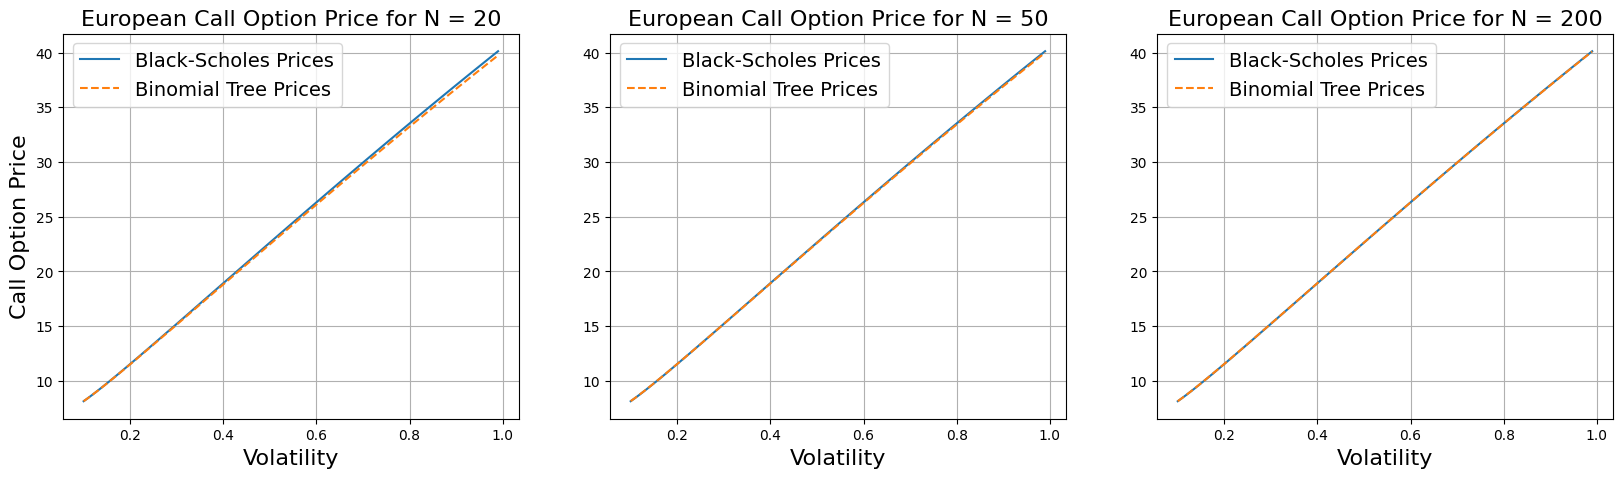

In [13]:
S = 100 
T = 1.0 
N = 50  
K = 99 
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N_range = [20, 50, 200]
# Plot the option prices for different volatilities
plt.figure(figsize=(20, 5))
for i, N in enumerate(N_range):
    bs_prices, binomial_prices = compare_volatilities(S, K, T, r, vol_range, N)
    plt.subplot(1, 3, i+1)
    plt.plot(vol_range, bs_prices, label='Black-Scholes Prices')
    plt.plot(vol_range, binomial_prices, label='Binomial Tree Prices', linestyle='--')
    plt.title(f'European Call Option Price for N = {N}', fontsize=16)
    plt.xlabel('Volatility', fontsize=16)
    if i == 0:
        plt.ylabel('Call Option Price', fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True)
plt.savefig("5.2.2.1optionprice.png", bbox_inches='tight', dpi = 300)
plt.show()




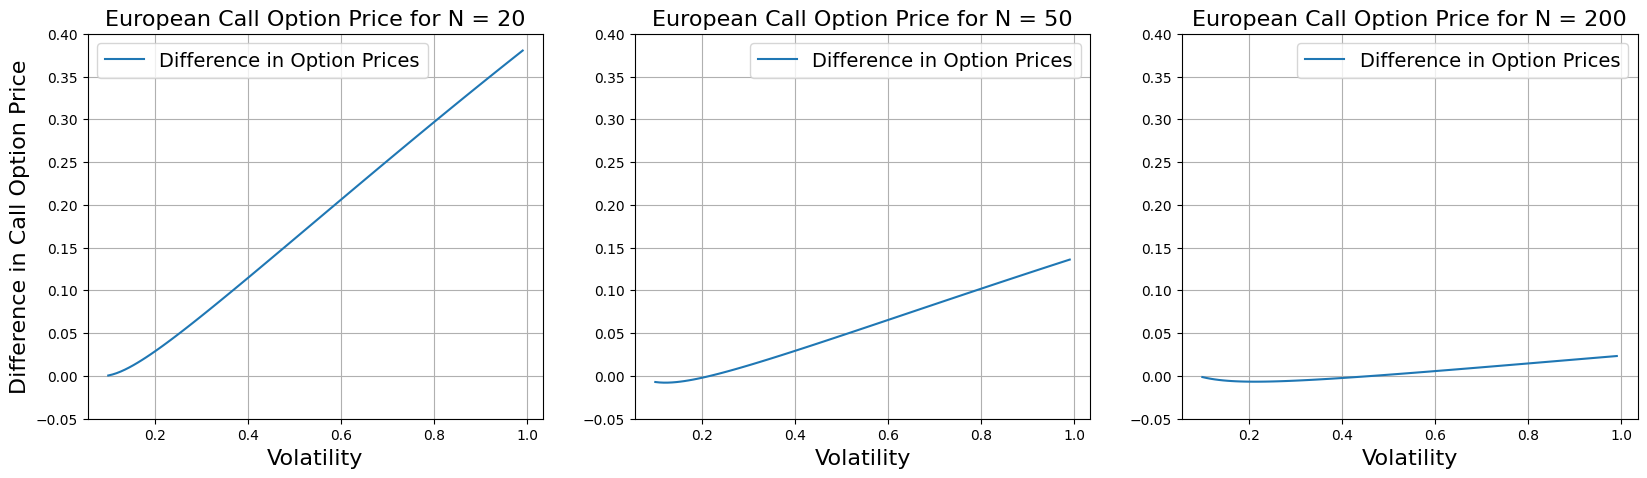

In [14]:
S = 100 
T = 1.0 
N = 50  
K = 99 
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N_range = [20, 50, 200]
# Plotting both Black-Scholes and Binomial tree prices difference for comparison
plt.figure(figsize=(20, 5))
for i, N in enumerate(N_range):
    bs_prices, binomial_prices = compare_volatilities(S, K, T, r, vol_range, N)
    plt.subplot(1, 3, i+1)
    plt.plot(vol_range, np.array(bs_prices) - np.array(binomial_prices), label='Difference in Option Prices')
    plt.title(f'European Call Option Price for N = {N}', fontsize = 16)
    plt.xlabel('Volatility', fontsize=16)
    if i == 0:
        plt.ylabel('Difference in Call Option Price', fontsize=16)
    plt.ylim(-0.05, 0.4)
    plt.legend(fontsize = 14)
    plt.grid(True)
plt.savefig("5.2.2.1differenceoptionprice.jpg", bbox_inches='tight', dpi=300)
plt.show()

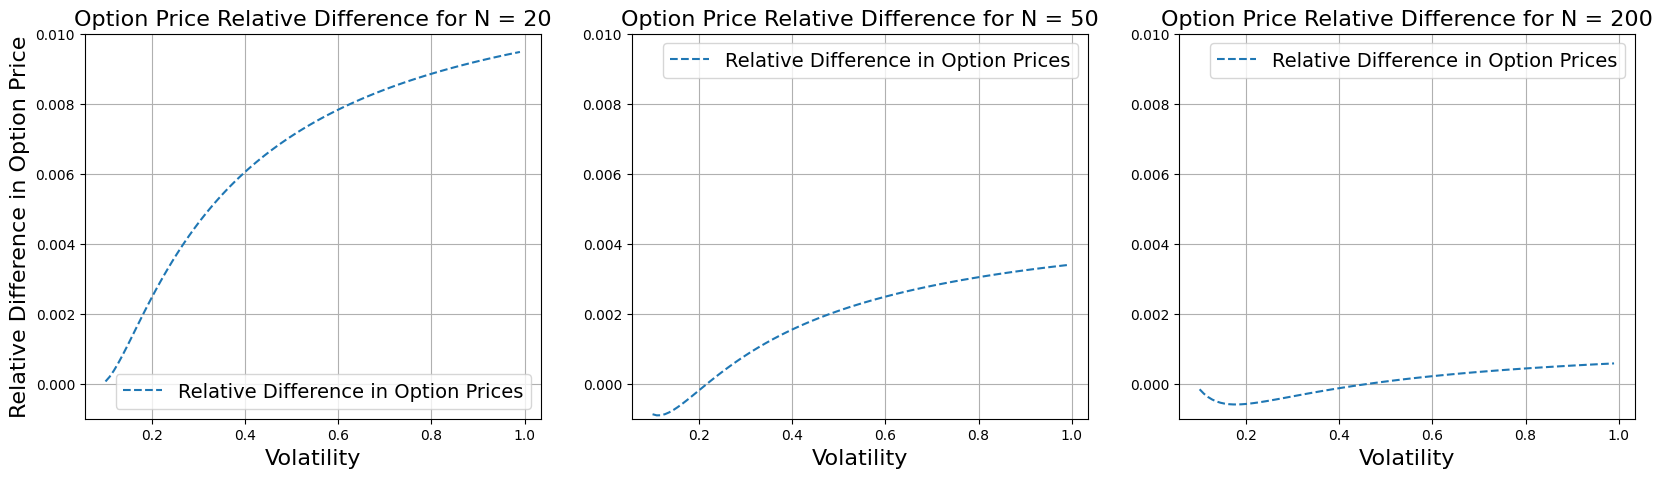

In [15]:
S = 100 
T = 1.0 
N = 50  
K = 99 
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N_range = [20, 50, 200]
plt.figure(figsize=(20, 5))
for i, N in enumerate(N_range):
    bs_prices, binomial_prices = compare_volatilities(S, K, T, r, vol_range, N)
    plt.subplot(1, 3, i+1)
    plt.plot(vol_range, (np.array(bs_prices) - np.array(binomial_prices))/np.array(bs_prices), label='Relative Difference in Option Prices', linestyle='--')   
    plt.title(f'Option Price Relative Difference for N = {N}', fontsize = 16)
    plt.xlabel('Volatility', fontsize=16)
    if i == 0:
        plt.ylabel('Relative Difference in Option Price', fontsize=16)
    plt.ylim(-0.001, 0.01)
    plt.legend(fontsize = 14)
    plt.grid(True)
plt.savefig("5.2.2.2reldifferenceinoptionprice.png", bbox_inches='tight', dpi=300)
plt.show()

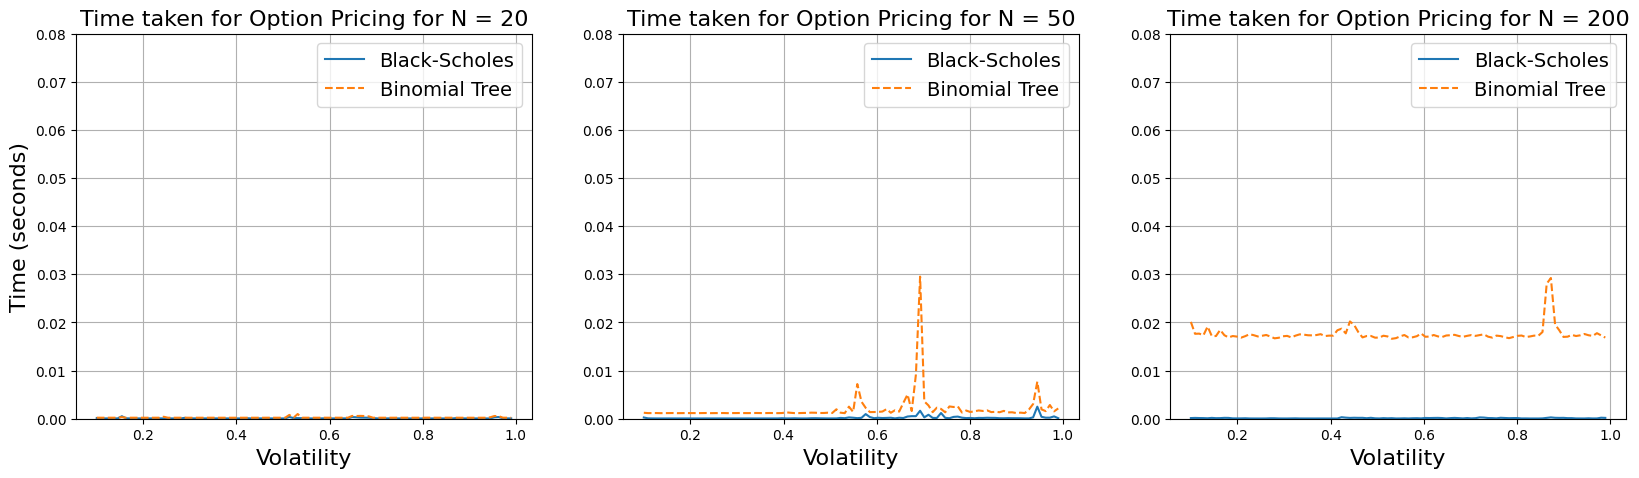

In [16]:
sigma = 0.2  
S = 100 
T = 1.0 
N = 50  
K = 99 
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N_range = [20, 50, 200]

# Plotting the time taken for option pricing for different volatilities
plt.figure(figsize=(20, 5))
for i, N in enumerate(N_range):

    bs_times = []
    bt_times = []
    for vol in vol_range:
        start_bs = time.time()
        bs_prices = black_scholes_call(S, K, T, r, vol)
        end_bs = time.time()
        bs_time = end_bs - start_bs
        bs_times.append(bs_time)
        start_bt = time.time()
        bt_prices = value_option_matrix(build_tree(S, vol, T, N), T, r, K, vol)
        end_bt = time.time()
        bt_time = end_bt - start_bt
        bt_times.append(bt_time)
    plt.subplot(1, 3, i+1)
    plt.plot(vol_range, bs_times, label='Black-Scholes')
    plt.plot(vol_range, bt_times, label='Binomial Tree', linestyle='--')
    plt.title(f'Time taken for Option Pricing for N = {N}', fontsize = 16)
    plt.xlabel('Volatility', fontsize=16)
    if i == 0:
        plt.ylabel('Time (seconds)', fontsize=16)
    plt.ylim(0, 0.08)
    plt.legend(fontsize = 14)
    plt.grid(True)
plt.savefig("5.2.2.3timeforoptionpricing.png", bbox_inches='tight', dpi=300)
plt.show()


#### 3. Convergence

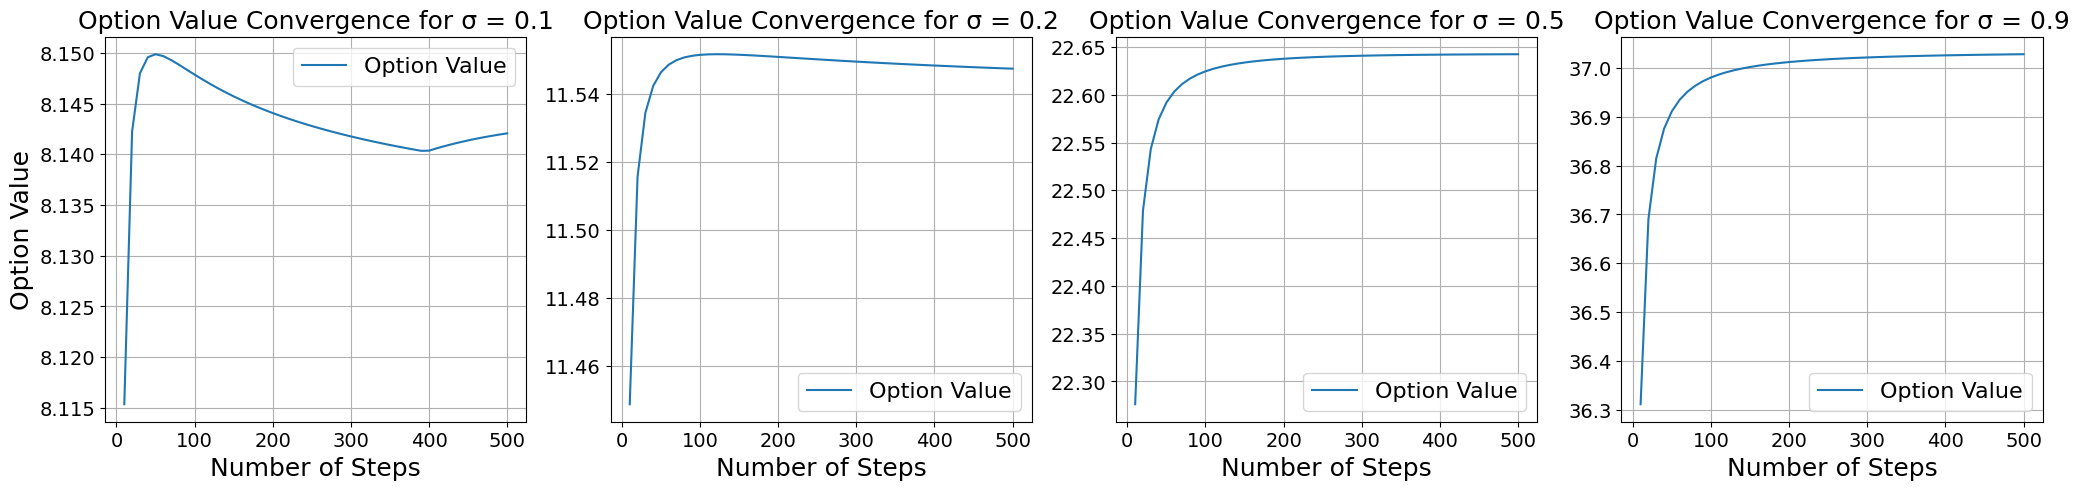

In [17]:
sigma = 0.2  
S = 100 
T = 1.0 
N = 50  
K = 99 
r = 0.06 
N_values = np.arange(10, 501, 10)
volatility_values = [0.1,0.2,0.5,0.9]

# Plot the option value convergence when increasing the number of steps in the binomial tree
plt.figure(figsize=(25, 5))
for i, vol in enumerate(volatility_values):
    option_values = []
    for N in N_values:
        tree = build_tree(S, vol, T, N)
        option_price = value_option_matrix(tree, T, r, K, vol)
        option_values.append(option_price)
    plt.subplot(1, 4, i+1)
    plt.plot(N_values, option_values, label='Option Value')
    plt.title(f'Option Value Convergence for σ = {vol}', fontsize = 18)
    plt.xlabel('Number of Steps', fontsize=18)
    if i == 0:
        plt.ylabel('Option Value', fontsize=18)
    plt.legend(fontsize = 16)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig("5.2.3convergence.jpg", dpi=300, bbox_inches='tight')


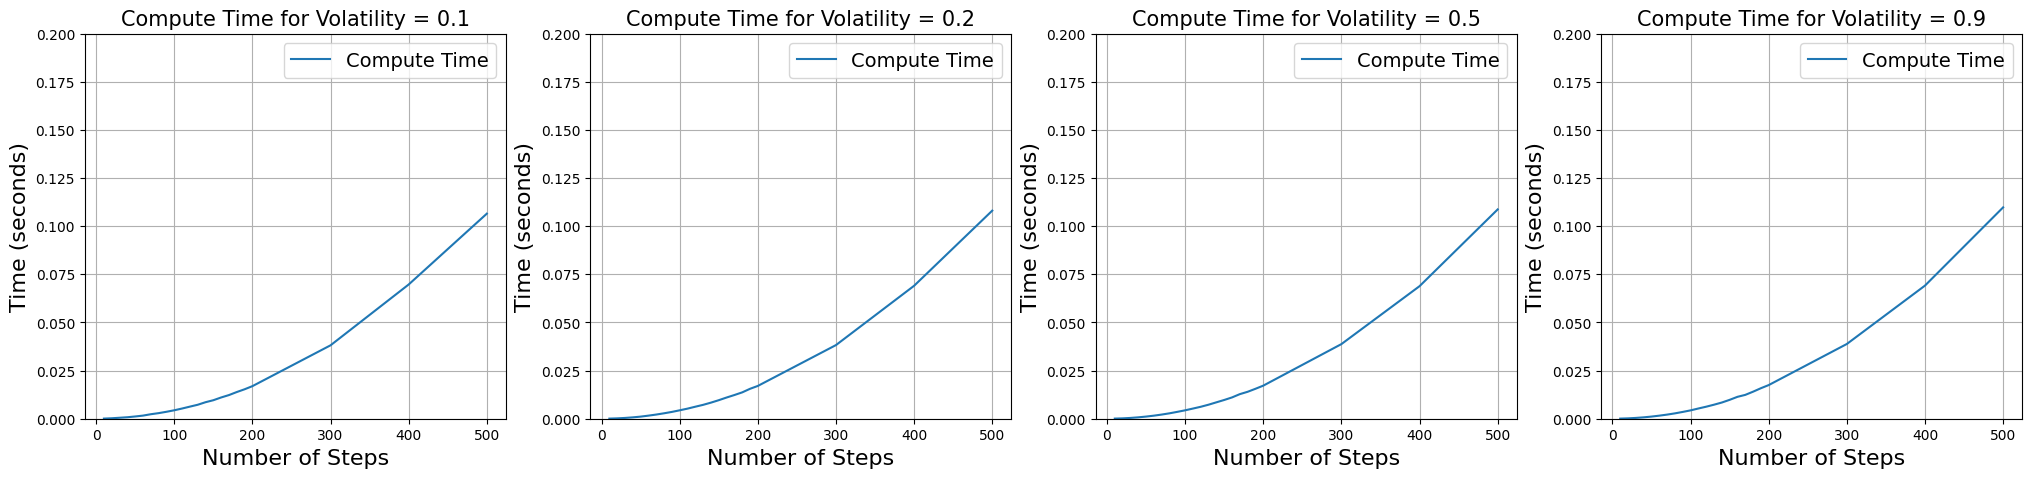

In [18]:
sigma = 0.2  
S = 100 
T = 1.0 
N = 50  
K = 99 
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N_range = [20, 50, 200]
N_values = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,300,400,500]
volatility_values = [0.1,0.2,0.5,0.9]

# Plot the average compute time when increasing the number of steps in the binomial tree
plt.figure(figsize=(25, 5))
for i, vol in enumerate(volatility_values):
    compute_times = []
    for N in N_values:
        compute_times_1 = []
        for j in range(10):
            start = time.time()
            tree = build_tree(S, vol, T, N)
            option_price = value_option_matrix(tree, T, r, K, vol)
            end = time.time()
            compute_time = end - start
            compute_times_1.append(compute_time)
        compute_times.append(np.mean(compute_times_1))
    plt.subplot(1, 4, i+1)
    plt.plot(N_values, compute_times, label='Compute Time')
    plt.title(f'Compute Time for Volatility = {vol}', fontsize = 15)
    plt.xlabel('Number of Steps', fontsize=16)
    plt.ylabel('Time (seconds)', fontsize=16)
    plt.ylim(0,0.2)
    plt.legend(fontsize = 14)
    plt.grid(True)

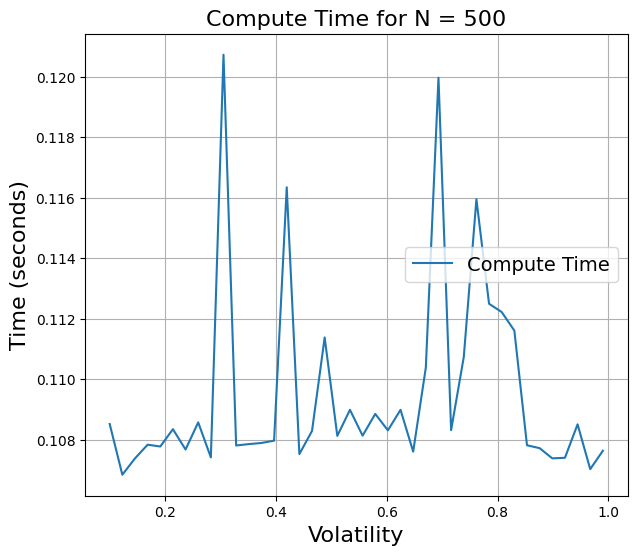

In [19]:
sigma = 0.2  
S = 100 
T = 1.0 
N = 500 
K = 99 
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 40)

# Plot the average compute time with different volatilities
plt.figure(figsize=(7, 6))
compute_times = []
for vol in vol_range:
    compute_times_1 = []
    for j in range(10):
        start = time.time()
        tree = build_tree(S, vol, T, N)
        option_price = value_option_matrix(tree, T, r, K, vol)
        end = time.time()
        compute_time = end - start
        compute_times_1.append(compute_time)
    compute_times.append(np.mean(compute_times_1))
plt.plot(vol_range, compute_times, label='Compute Time')
plt.title(f'Compute Time for N = {N}', fontsize = 16)
plt.xlabel('Volatility', fontsize=16)
plt.ylabel('Time (seconds)', fontsize=16)

plt.legend(fontsize = 14)
plt.grid(True)
plt.show()


#### 4. Compare \delta

In [20]:
def binomial_tree_delta(S, K, T, r, sigma, N):
    '''
    Compute the delta of a European call option using a binomial tree.
    Parameters:
        S : float
            Current stock price
        K : float
            Strike price
        T : float
            Time to expiration
        r : float
            Risk-free interest rate
        sigma : float
            Volatility
        N : int
            Number of steps
    Returns:
        Delta : float
            Delta of the option
    '''
    dt = T / N  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
    tree = build_tree(S, sigma, T, N)
    option_price = value_option_matrix(tree, T, r, K, sigma)
    tree_up = build_tree(S * u, sigma, T, N)
    option_price_up = value_option_matrix(tree_up, T, r, K, sigma)
    tree_down = build_tree(S * d, sigma, T, N)
    option_price_down = value_option_matrix(tree_down, T, r, K, sigma)
    Delta = (option_price_up - option_price_down) / (S * (u - d))
    return Delta

def black_scholes_delta(S, K, T, r, sigma):
    '''
    Compute the delta of a European call option using the Black-Scholes formula.
    Parameters:
        S : float
            Current stock price
        K : float
            Strike price
        T : float
            Time to expiration
        r : float
            Risk-free interest rate
        sigma : float
            Volatility
    Returns:
        Delta : float
            Delta of the option'''
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    Delta = si.norm.cdf(d1)
    return Delta

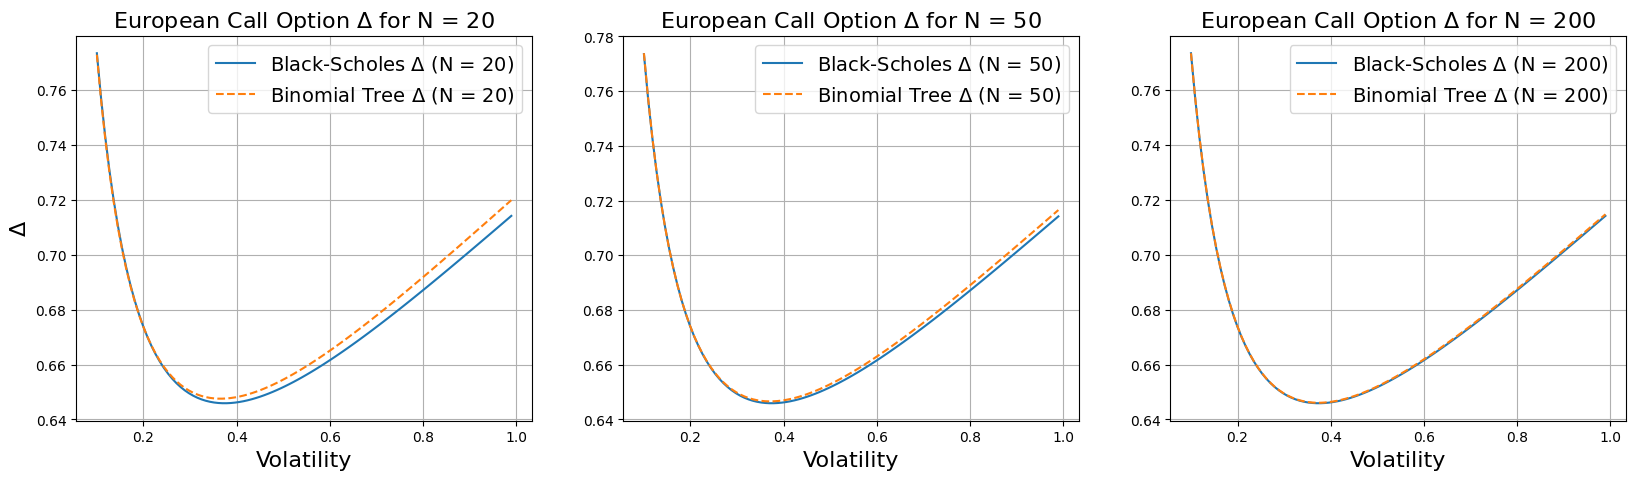

In [21]:
sigma = 0.2  
S = 100 
T = 1.0 
N = 50  
K = 99 
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N_range = [20, 50, 200]
#Plot the delta values for different volatilities using Black-Scholes and Binomial tree models(N = 20,50,200) in label
plt.figure(figsize=(20, 5))
for i, N in enumerate(N_range):
    bs_deltas = []
    bt_deltas = []
    for vol in vol_range:
        bs_delta = black_scholes_delta(S, K, T, r, vol)
        bs_deltas.append(bs_delta)
        bt_delta = binomial_tree_delta(S, K, T, r, vol, N)
        bt_deltas.append(bt_delta)
    plt.subplot(1, 3, i+1)
    plt.plot(vol_range, bs_deltas, label=f'Black-Scholes $\Delta$ (N = {N})')
    plt.plot(vol_range, bt_deltas, label=f'Binomial Tree $\Delta$ (N = {N})', linestyle='--')
    plt.title(f'European Call Option $\Delta$ for N = {N}', fontsize = 16)
    plt.xlabel('Volatility', fontsize=16)
    if i == 0:
        # Set y label = $\Delta$
        plt.ylabel('$\Delta$', fontsize=16)
    plt.legend(fontsize = 14)
    plt.grid(True)
plt.savefig("5.4.1delta.png", bbox_inches='tight', dpi=300)
plt.show()


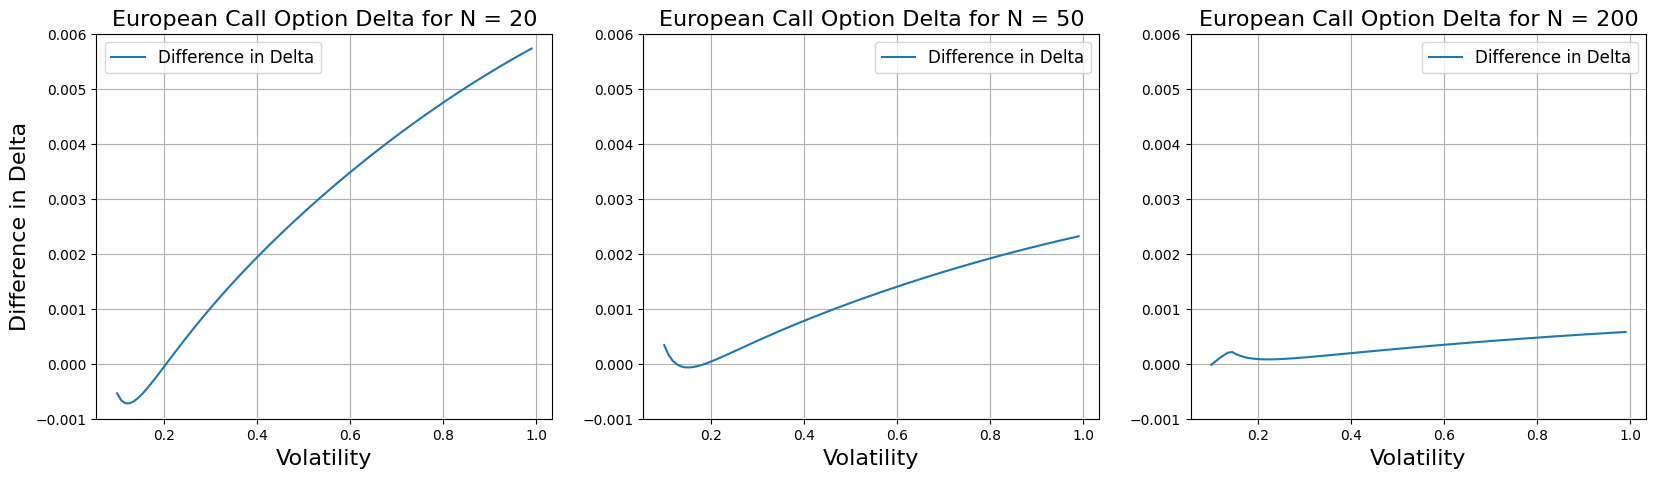

In [22]:
sigma = 0.2  
S = 100 
T = 1.0 
N = 50  
K = 99 
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N_range = [20, 50, 200]
#Plot the delta values' difference for different volatilities using Black-Scholes and Binomial tree models(N = 20,50,200) in label
plt.figure(figsize=(20, 5))
for i, N in enumerate(N_range):
    bs_deltas = []
    bt_deltas = []
    for vol in vol_range:
        bs_delta = black_scholes_delta(S, K, T, r, vol)
        bs_deltas.append(bs_delta)
        bt_delta = binomial_tree_delta(S, K, T, r, vol, N)
        bt_deltas.append(bt_delta)
    deltas_difference = np.array(bt_deltas) - np.array(bs_deltas)
    plt.subplot(1, 3, i+1)
    plt.plot(vol_range, deltas_difference, label='Difference in Delta')
    plt.title(f'European Call Option Delta for N = {N}', fontsize = 16)
    plt.xlabel('Volatility', fontsize=16)
    if i == 0:
        plt.ylabel('Difference in Delta', fontsize=16)
    plt.legend(fontsize = 12)
    plt.ylim(-0.001,0.006)
    plt.grid(True)
plt.show()

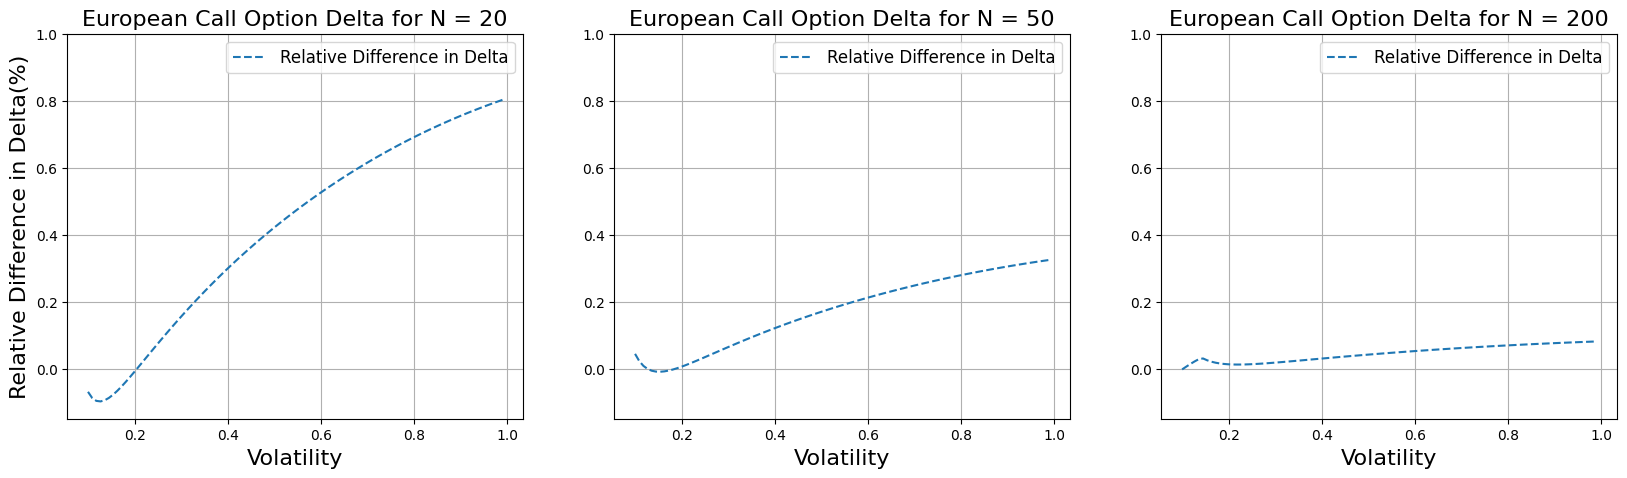

In [23]:
sigma = 0.2  
S = 100 
T = 1.0 
N = 50  
K = 99 
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N_range = [20, 50, 200]
#Plot the delta values' ralative difference for different volatilities using Black-Scholes and Binomial tree models(N = 20,50,200) in label
plt.figure(figsize=(20, 5))
for i, N in enumerate(N_range):
    bs_deltas = []
    bt_deltas = []
    for vol in vol_range:
        bs_delta = black_scholes_delta(S, K, T, r, vol)
        bs_deltas.append(bs_delta)
        bt_delta = binomial_tree_delta(S, K, T, r, vol, N)
        bt_deltas.append(bt_delta)
    deltas_relative_difference = (np.array(bt_deltas) - np.array(bs_deltas))/np.array(bs_deltas) * 100
    plt.subplot(1, 3, i+1)
    plt.plot(vol_range, deltas_relative_difference, label='Relative Difference in Delta', linestyle='--')
    plt.title(f'European Call Option Delta for N = {N}', fontsize = 16)
    plt.xlabel('Volatility', fontsize=16)
    if i == 0:
        plt.ylabel('Relative Difference in Delta(%)', fontsize=16)
    # use % for y-axis
    plt.ylim(-0.15,1)
    plt.legend(fontsize = 12)
    plt.grid(True)
plt.show()

#### 5. American Call Option for Binomial Tree Model

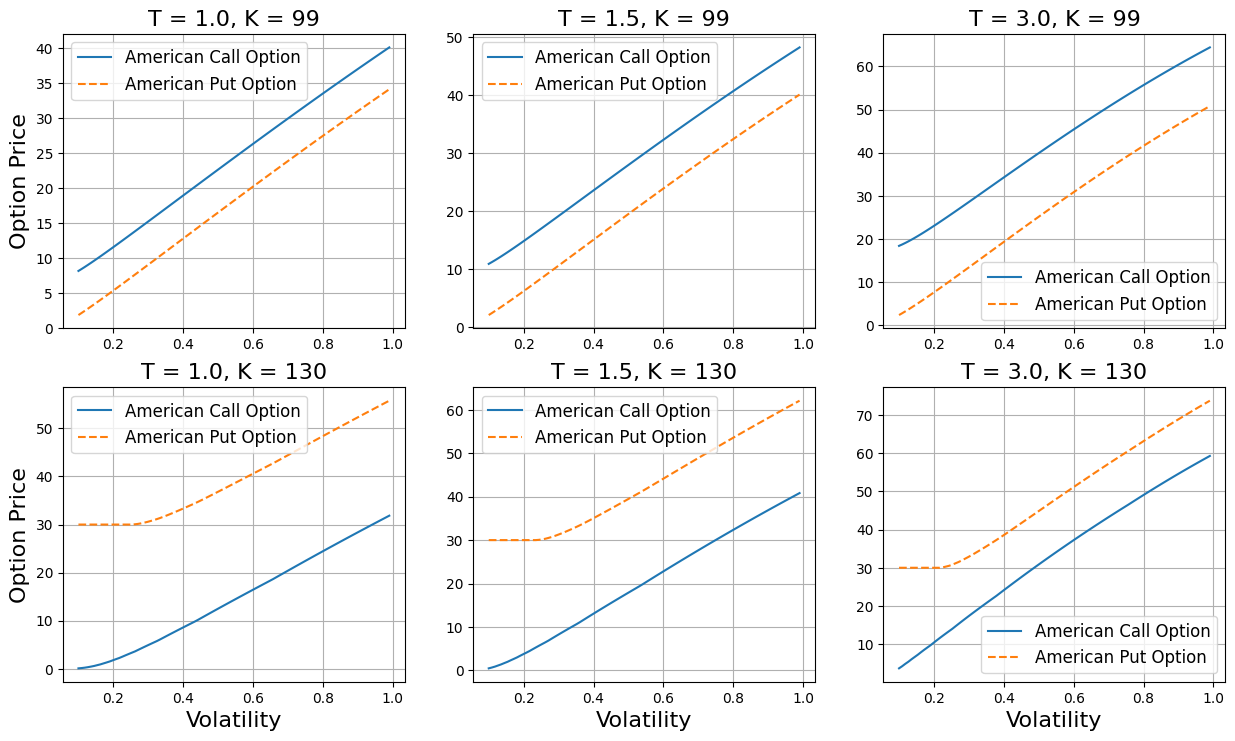

In [24]:
def american_option_pricing(S0, K, r, T, sigma, N, option_type):
    '''
    Compute the price of an American option using a binomial tree.
    Parameters:
        S0 : float
            Current stock price
        K : float
            Strike price
        r : float
            Risk-free interest rate
        T : float
            Time to expiration
        sigma : float
            Volatility
        N : int
            Number of steps
        option_type : str
            Type of the option ('call' or 'put')
    Returns:
        option_tree[0, 0] : float
            Price of the American option
    '''
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Build the stock price tree and the option price tree
    stock_tree = np.zeros((N+1, N+1))
    option_tree = np.zeros((N+1, N+1))
    
    for j in range(N+1):
        stock_tree[N, j] = S0 * (u ** (N - j)) * (d ** j)
        if option_type == 'call':
            option_tree[N, j] = max(0, stock_tree[N, j] - K)
        elif option_type == 'put':
            option_tree[N, j] = max(0, K - stock_tree[N, j])
    
    # Calculate option price at each node of the tree based on the option type and the early exercise premium
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            stock_tree[i, j] = S0 * (u ** (i - j)) * (d ** j)
            if option_type == 'call':
                option_tree[i, j] = max(0, stock_tree[i, j] - K, np.exp(-r*dt) * (p * option_tree[i+1, j] + (1-p) * option_tree[i+1, j+1]))
            elif option_type == 'put':
                option_tree[i, j] = max(0, K - stock_tree[i, j], np.exp(-r*dt) * (p * option_tree[i+1, j] + (1-p) * option_tree[i+1, j+1]))
    
    return option_tree[0, 0]


S = 100 
T_range = [1.0, 1.5, 3.0]  
K_range = [99,130]
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N =100
# Plot 2*3 subplots call and put option prices for different volatilities

plt.figure(figsize=(15,13))

for i, K in enumerate(K_range):
    for j, T in enumerate(T_range):
        call_prices = []
        put_prices = []
        for vol in vol_range:
            tree = build_tree(S, vol, T, N)
            #(S0, K, r, T, sigma, N, option_type)
            call_price = american_option_pricing(S, K, r, T, vol, N, option_type='call')
            call_prices.append(call_price)
            put_price = american_option_pricing(S, K, r, T, vol, N, option_type='put')
            put_prices.append(put_price)
        plt.subplot(3, 3, i*3+j+1)
        plt.plot(vol_range, call_prices, label='American Call Option')
        plt.plot(vol_range, put_prices, label='American Put Option', linestyle='--')
        if j == 0:
            plt.ylabel('Option Price', fontsize=16)
        if i == 1:
            plt.xlabel('Volatility', fontsize=16)
        plt.title(f'T = {T}, K = {K}', fontsize = 16)
        plt.grid(True)
        plt.legend(fontsize = 12)
plt.savefig("5.2.5american.png", dpi = 300, bbox_inches = "tight")
  

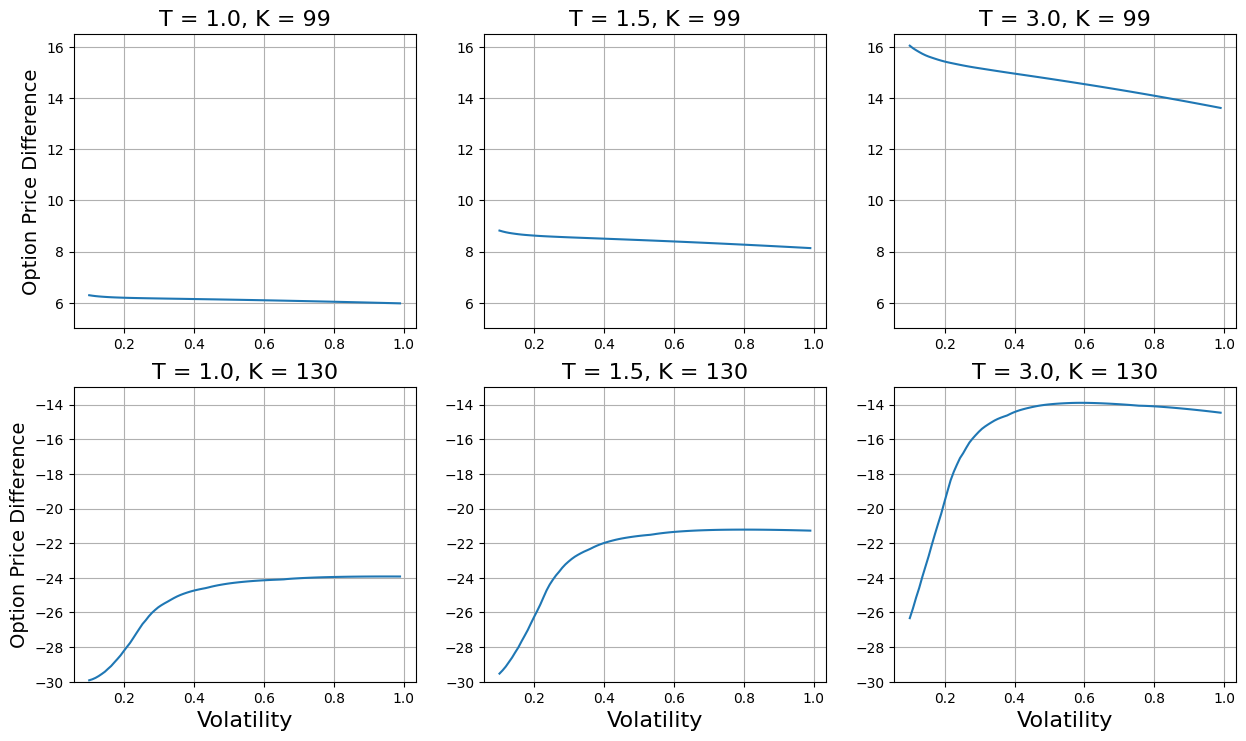

In [32]:
S = 100 
T_range = [1.0, 1.5, 3.0]  
K_range = [99,130]
r = 0.06 
vol_range = np.linspace(0.1, 0.99, 100)
N =100

plt.figure(figsize=(15,13))

for i, K in enumerate(K_range):
    for j, T in enumerate(T_range):
        call_prices = []
        put_prices = []
        for vol in vol_range:
            tree = build_tree(S, vol, T, N)
            call_price = american_option_pricing(S, K, r, T, vol, N, option_type='call')
            call_prices.append(call_price)
            put_price = american_option_pricing(S, K, r, T, vol, N, option_type='put')
            put_prices.append(put_price)
        plt.subplot(3, 3, i*3+j+1)
        diff = np.array(call_prices) - np.array(put_prices)
        plt.plot(vol_range, diff, label='Difference in Option Prices')
        if j == 0:
            plt.ylabel('Option Price Difference', fontsize=14)
        if i == 1:
            plt.xlabel('Volatility', fontsize=16)
        if K == 99:
            plt.ylim(5,16.5)
        if K == 130:
            plt.ylim(-30, -13)
        plt.title(f'T = {T}, K = {K}', fontsize = 16)
        plt.grid(True)
plt.savefig("5.2.5.2diff_american.png", dpi = 300, bbox_inches = "tight")

## Part III Black-Scholes: hedging simulations

### 1.Prove: ∆t = $N\left(d_{1}\right)$

From the appendix we can prove that V(t) can be expressed as follows
$$
\begin{aligned}
V(t)& = e^{-r\tau}\mathbb{E}\left[(S_{T}-K)^{+}\right]  \\
&= e^{-r\tau}\mathbb{E}\left[\left(S_t\exp\left\{\left(r-\frac{1}{2}\sigma^2\right)\tau-\sigma\sqrt{\tau}Z\right\}-K\right)^+\right] \\
&= \frac{e^{-r\tau}}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\left(S_{t}\exp\left\{\left(r-\frac12\sigma^{2}\right)\tau-\sigma\sqrt{\tau}x\right\}-K\right)^{+}e^{-\frac12x^{2}}dx
\end{aligned}
$$


The integrand of the integral above is only non-zero if $S_t\exp\left\{\left(r-\frac12\sigma^2\right)\tau-\sigma\sqrt{\tau}x\right\}-K>0.$ 

This is exactly the case whenever for the integration-variable $x$ we have

$$
\begin{aligned}
x<\frac{\log\left(\frac{S_t}{K}\right)+\left(r-\frac{1}{2}\sigma^2\right)\tau}{\sigma\sqrt{\tau}}:=d_2
\end{aligned}
$$

Let $N( x) : = \frac 1{\sqrt {2\pi}}\int _{- \infty}^xe^{- \frac 12u^2}du$ denote the standard normal cumulative distribution function. 

Then the integral on the right can easily be rewritten as

$$
\begin{aligned}
\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{d_2}e^{-r\tau}Ke^{-\frac{1}{2}x^2}dx&=e^{-r\tau}KN\left(d_2\right)
\end{aligned}
$$

$\begin{aligned}
&\text{The integral on the left is trickier and requires a variable substitution. Define }y=x+\sigma\sqrt{\tau}, \\
&\text{then the integral can be rewritten as}
\end{aligned}$

$$
\begin{aligned}
&\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{d_{2}}e^{-r\tau}S_{t}\exp\left\{\left(r-\frac{1}{2}\sigma^{2}\right)\tau-\sigma\sqrt{\tau}x\right\}e^{-\frac{1}{2}x^{2}}dx \\
&=\frac{S_{t}}{\sqrt{2\pi}}\int_{-\infty}^{d_{2}}\exp\left\{-\frac{1}{2}\left(x+\sigma\sqrt{\tau}\right)^{2}\right\}dx \\
&=\frac{S_{t}}{\sqrt{2\pi}}\int_{-\infty}^{d_{2}+\sigma\sqrt{\tau}}\exp\left\{-\frac{1}{2}y^{2}\right\}dy=S_{t}N(d_{1})
\end{aligned}
$$

$\mathrm{where~we~inherently~defined~}d_{1}:=d_{2}+\sigma\sqrt{\tau}.\mathrm{Our~final~result~is~what~is~known~as~the~Black-Scholes~formula~for~a~call~option:}$

$$\begin{aligned}
V(t)& =S_{t}N\left(d_{1}\right)-e^{-r\tau}KN\left(d_{2}\right)  \\
d_{1}& =\frac{\log\left(\frac{S_t}K\right)+\left(r+\frac12\sigma^2\right)\tau}{\sigma\sqrt{\tau}}  \\
d_{2}& =d_1-\sigma\sqrt{\tau} 
\end{aligned}$$

We have 
$$
\begin{aligned}
\Delta_{t} &= \frac{\partial C_{t}}{\partial S_{t}} \\
C_{t} &= V_{t} \\
V(t) &= S_tN(d_1) - e^{-rT}KN(d_2)
\end{aligned}
$$
where $N(x)$ denotes the standard normal cumulative distribution function.


Regarding the term $N(x)$, x = d1 or d2, although $x$ is related to the stock price $S_t$, the derivative of $N(x)$ with respect to $S_t$ equals zero. That is because $N(x)$ is the cumulative distribution function of the standard normal distribution, and $x$ incorporates $S_t$ indirectly through $d_1$. However, the impact of $S_t$ on $N(x)$ is not linear and does not directly affect the derivative $\frac{\partial C_t}{\partial S_t}$ which is the Delta of the option.  When we take the derivative of the option price $C_t$ with respect to $S_t$, we are calculating how much the value of $C_t$ changes with a small change in $S_t$. 

So we have 
$$
\begin{aligned}\Delta_{t}=\frac{\partial C_{t}}{\partial S_{t}}=\frac{\partial S_{t}N\left(d_{1}\right)}{\partial S_{t}}=N\left(d_{1}\right)
\end{aligned}
$$


### 2.Prove: $P_t=e^{-r\tau}KN\left(-d_2\right)-S_tN\left(-d_1\right)$

We have 
$$
\begin{aligned}
V(t) &= S_tN(d_1) - e^{-rT}KN(d_2), \\
C_t - P_t &= S_t - e^{-rT}K.
\end{aligned}
$$

For the risk-neutral price \(V(t)\) of the option, we denote \(C_t\), as follows:
$$
\begin{aligned}
P_t &= (S_tN(d_1) - e^{-rT}KN(d_2)) - S_t + e^{-rT}K.
\end{aligned}
$$
From the properties of the standard normal cumulative distribution function: \(N(-d) = 1 - N(d)\). This can be simplified to:
$$
\begin{aligned}
P_t &= e^{-rT}KN(-d_2) - S_tN(-d_1).
\end{aligned}
$$


### 3.Use the Euler method to perform a hedging simulation

Basic model(volatility = 0.20, Vary the frequency of the hedge adjustment Daily, Runtime = 100)

In [26]:

# Given parameters for the option
S0 = 100       # Current stock price
K = 99         # Strike price
T = 1          # Time to maturity in years
r = 0.06       # Risk-free interest rate
volatility = 0.20  # Volatility of the stock

# Simulation parameters
dt = 1/252         # Daily time step in years, assuming 252 trading days in a year
n_steps = int(T / dt)  # Number of time steps

# Function to simulate stock price paths using the Euler method
def simulate_stock_price(S0, r, volatility, dt, n_steps):
    dt_sqrt = np.sqrt(dt)
    stock_paths = np.empty(n_steps + 1)
    stock_paths[0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal()
        stock_paths[t] = stock_paths[t - 1] * np.exp((r - 0.5 * volatility**2) * dt + volatility * dt_sqrt * Z)
    return stock_paths

# Function to calculate option price using Black-Scholes formula
def black_scholes_call(S, K, T, r, volatility):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    d2 = d1 - volatility * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate Delta
def calculate_delta(S, K, T, r, volatility):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Perform the hedging simulation multiple times
n_trials = 1000
hedge_results = np.empty(n_trials)
print(black_scholes_call(S0, K, T, r, volatility))
for i in range(n_trials):
    # Simulate stock price path
    stock_prices = simulate_stock_price(S0, r, volatility, dt, n_steps)
    
    # Calculate the option price at the beginning
    option_price_initial = black_scholes_call(S0, K, T, r, volatility)
    
    # Initialize cash position as the price of the option
    cash_position = option_price_initial
    
    # Start with zero stock position
    stock_position = 0
    
    # Perform the hedging
    for t in range(1, n_steps):
        # Calculate new delta
        delta = calculate_delta(stock_prices[t-1], K, T-t*dt, r, volatility)
        
        # Update cash position with the risk-free rate
        cash_position *= np.exp(r * dt)
        
        # Update cash position with the change in stock price
        cash_position -= (delta - stock_position) * stock_prices[t]

        # Rebalance the stock position to maintain delta neutrality
        stock_position += (delta - stock_position)
    
    # Final profit/loss of the hedging strategy
    option_price_final = black_scholes_call(stock_prices[-1], K, T-t*dt, r, volatility)
    hedge_results[i] = cash_position + stock_position * stock_prices[-1] - option_price_final

# Calculate and print the results
hedge_mean = np.mean(hedge_results)
hedge_std = np.std(hedge_results)


hedge_mean, hedge_std


11.544280227051097


(0.00703454004995741, 1.1901083164554902)

Vary the frequency of the hedge adjustment

In [27]:

# Given parameters for the option
S0 = 100       # Current stock price
K = 99         # Strike price
T = 1          # Time to maturity in years
r = 0.06       # Risk-free interest rate
volatility = 0.20  # Volatility of the stock

# Simulation parameters
dt = 1/252         # Daily time step in years, assuming 252 trading days in a year
n_steps = int(T / dt)  # Number of time steps
Vary_hedge_adjustment_per_days = [1, 2, 7, 14, 30, 60]
# Function to simulate stock price paths using the Euler method
def simulate_stock_price(S0, r, volatility, dt, n_steps):
    dt_sqrt = np.sqrt(dt)
    stock_paths = np.empty(n_steps + 1)
    stock_paths[0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal()
        stock_paths[t] = stock_paths[t - 1] * np.exp((r - 0.5 * volatility**2) * dt + volatility * dt_sqrt * Z)
    return stock_paths

# Function to calculate option price using Black-Scholes formula
def black_scholes_call(S, K, T, r, volatility):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    d2 = d1 - volatility * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate Delta
def calculate_delta(S, K, T, r, volatility):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Perform the hedging simulation multiple times
n_trials = 1000
results_hedge_adjustment = {}
for Vary_hedge_adjustment_per_day in Vary_hedge_adjustment_per_days:
    hedge_results = np.empty(n_trials)
    for i in range(n_trials):
        # Simulate stock price path
        stock_prices = simulate_stock_price(S0, r, volatility, dt, n_steps)
        
        # Calculate the option price at the beginning
        option_price_initial = black_scholes_call(S0, K, T, r, volatility)
        
        # Initialize cash position as the price of the option
        cash_position = option_price_initial
        
        # Start with zero stock position
        stock_position = 0
        
        # Perform the hedging
        for t in range(1, n_steps):
            if (t % Vary_hedge_adjustment_per_day == 0):
                # Calculate new delta
                delta = calculate_delta(stock_prices[t-1], K, T-t*dt, r, volatility)
                
                # Update cash position with the risk-free rate
                cash_position *= np.exp(r * Vary_hedge_adjustment_per_day * dt)
                
                # Update cash position with the change in stock price
                cash_position -= (delta - stock_position) * stock_prices[t]

                # Rebalance the stock position to maintain delta neutrality
                stock_position += (delta - stock_position)
        
        # Final profit/loss of the hedging strategy
        option_price_final = black_scholes_call(stock_prices[-1], K, T-t*dt, r, volatility)
        hedge_results[i] = cash_position + stock_position * stock_prices[-1] - option_price_final

    results_hedge_adjustment[Vary_hedge_adjustment_per_day] = hedge_results
    # Calculate and print the results
    hedge_mean = np.mean(hedge_results)
    hedge_std = np.std(hedge_results)


Box-plot

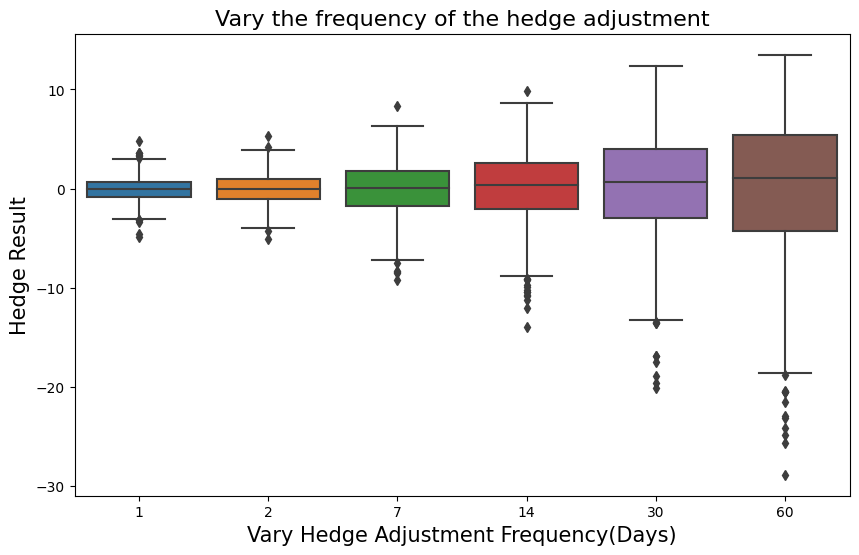

In [28]:
df = pd.DataFrame(results_hedge_adjustment)

df_melt = df.melt(var_name='Vary Hedge Adjustment Frequency(Days)', value_name='Hedge Result')
 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vary Hedge Adjustment Frequency(Days)', y='Hedge Result', data=df_melt)
plt.xlabel('Hedge Adjustment Frequency(Days)', fontsize = 15)
plt.ylabel('Hedge Result', fontsize = 15)
plt.savefig('Vary Hedge Adjustment Frequency.png',dpi = 500)
plt.show()

Change the volatility of delta valuation

In [29]:

# Given parameters for the option
S0 = 100       # Current stock price
K = 99         # Strike price
T = 1          # Time to maturity in years
r = 0.06       # Risk-free interest rate
volatility = 0.2  # Volatility of the stock

fractions = [0.1, 0.5, 1, 2, 10] 
volatility_deltas = [round(volatility * fraction,2) for fraction in fractions]
# Simulation parameters
dt = 1/252         # Daily time step in years, assuming 252 trading days in a year
n_steps = int(T / dt)  # Number of time steps

# Function to simulate stock price paths using the Euler method
def simulate_stock_price(S0, r, volatility, dt, n_steps):
    dt_sqrt = np.sqrt(dt)
    stock_paths = np.empty(n_steps + 1)
    stock_paths[0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal()
        stock_paths[t] = stock_paths[t - 1] * np.exp((r - 0.5 * volatility**2) * dt + volatility * dt_sqrt * Z)
    return stock_paths

# Function to calculate option price using Black-Scholes formula
def black_scholes_call(S, K, T, r, volatility):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    d2 = d1 - volatility * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate Delta
def calculate_delta(S, K, T, r, volatility):
    d1 = (np.log(S / K) + (r + 0.5 * volatility**2) * T) / (volatility * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Perform the hedging simulation multiple times
n_trials = 1000
results_vary_volatility = {}
for volatility_delta in volatility_deltas:
    hedge_results = np.empty(n_trials)
    for i in range(n_trials):
        # Simulate stock price path
        stock_prices = simulate_stock_price(S0, r, volatility, dt, n_steps)
        
        # Calculate the option price at the beginning
        option_price_initial = black_scholes_call(S0, K, T, r, volatility)
        
        # Initialize cash position as the price of the option
        cash_position = option_price_initial
        
        # Start with zero stock position
        stock_position = 0
        
        # Perform the hedging
        for t in range(1, n_steps):
            Vary_hedge_adjustment_per_days = 1
            if (t % Vary_hedge_adjustment_per_days == 0):
                # Calculate new delta
                delta = calculate_delta(stock_prices[t-1], K, T-t*dt, r, volatility_delta)
                
                # Update cash position with the risk-free rate
                cash_position *= np.exp(r * Vary_hedge_adjustment_per_days * dt)
                
                # Update cash position with the change in stock price
                cash_position -= (delta - stock_position) * stock_prices[t]

                # Rebalance the stock position to maintain delta neutrality
                stock_position += (delta - stock_position)
        
        # Final profit/loss of the hedging strategy
        option_price_final = black_scholes_call(stock_prices[-1], K, T-t*dt, r, volatility)
        hedge_results[i] = cash_position + stock_position * stock_prices[-1] - option_price_final

    results_vary_volatility[volatility_delta] = hedge_results
    # Calculate and print the results
    hedge_mean = np.mean(hedge_results)
    hedge_std = np.std(hedge_results)


Box-plot

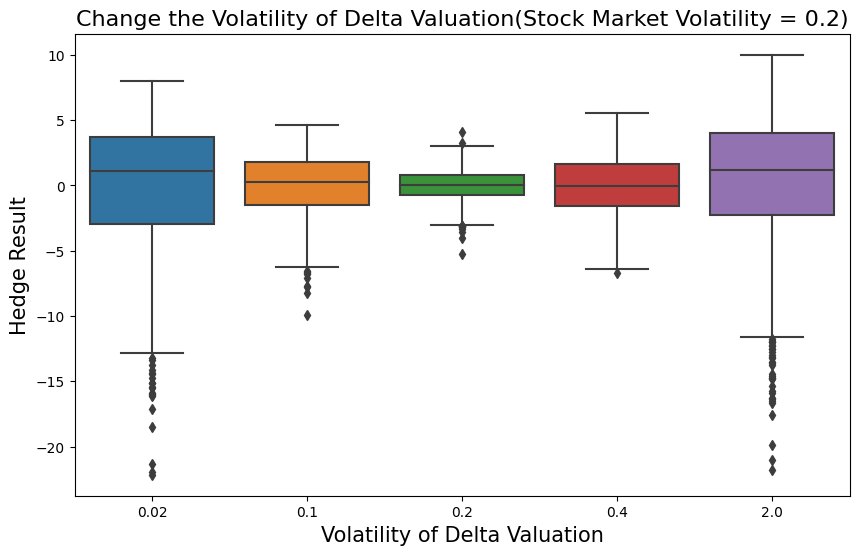

In [30]:
df = pd.DataFrame(results_vary_volatility)

df_melt = df.melt(var_name='Volatility of Delta Valuation', value_name='Hedge Result')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Volatility of Delta Valuation', y='Hedge Result', data=df_melt)
plt.xlabel('Volatility of Δ Valuation', fontsize=15)
plt.ylabel('Hedge Result', fontsize = 15)
plt.savefig('Change the Volatility of Delta Valuation',dpi = 500)
plt.show()